<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
df=pd.read_csv('../data/Wholesale customers data.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

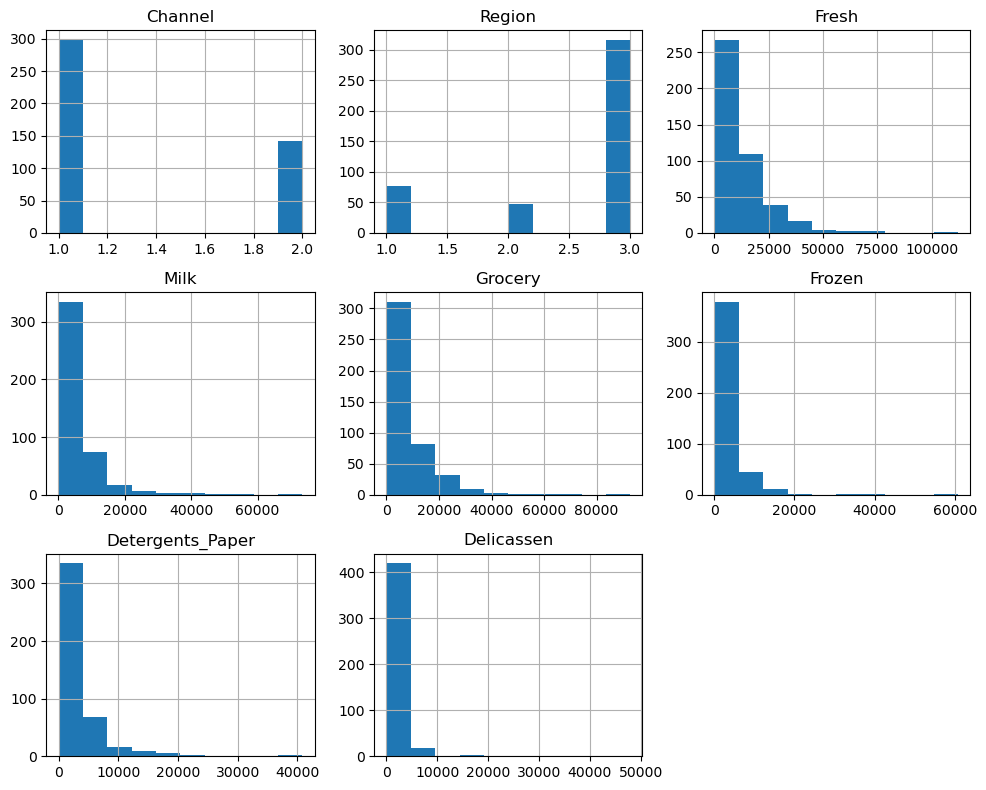

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [5]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

df.skew()

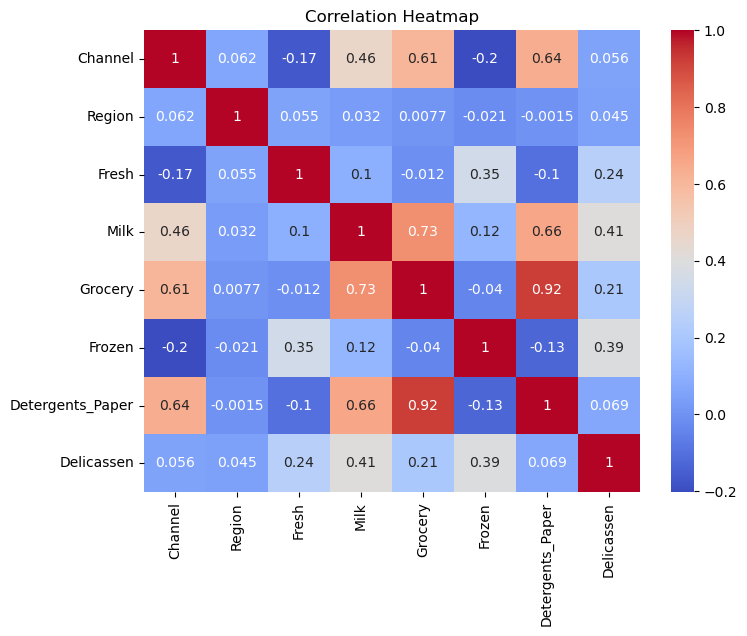

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

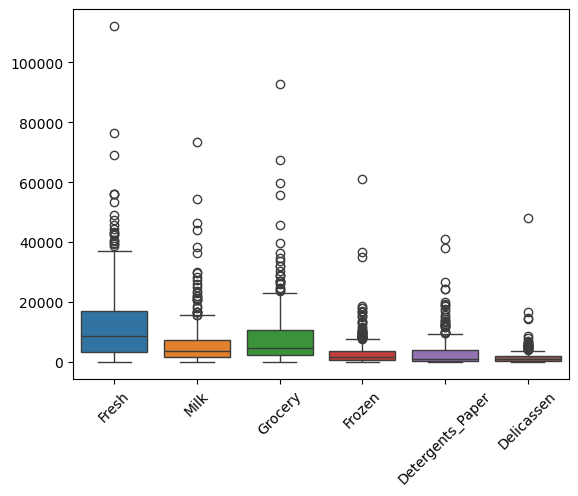

In [7]:
sns.boxplot(data=df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])
plt.xticks(rotation=45)
plt.show()


In [8]:
#Sort customers by grocery spending (descending).
sorted_df=df.sort_values(by="Grocery", ascending=False)
#Cumulative sum and percentage contribution.
sorted_df["cum_percent"]=sorted_df["Grocery"].cumsum()/sorted_df["Grocery"].sum()*100
#Number of customers in top 20%.
total_customers=len(sorted_df)
top_20pct=int(0.2*total_customers)
#Print the result.
print(f"Top 20% customers contribute {sorted_df.iloc[:top_20pct]['Grocery'].sum()/sorted_df['Grocery'].sum()*100:.2f}% of Grocery sales.")

Top 20% customers contribute 55.69% of Grocery sales.


**Your observations here**

- Grocery, milk and detergents_paper are strongly positively correlated, meaning these products tend to be bought together by similar customer types.
- Fresh, frozen, and Delicassen are weakly correlated with the other categories. 

The dataset has a clear structure. 

Top 20% of customers contribute to around 55.69% of grocery sales.
A small group of customers generates the majority of the revenue.



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
# Your code here
df_clean=df[(df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]]<
             df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]].quantile(0.99)).all(axis=1)]

print(f"Original data shape: {df.shape[0]} rows")
print(f"Cleaned data shape: {df_clean.shape[0]} rows")

Original data shape: 440 rows
Cleaned data shape: 421 rows


In [10]:
#Transformation to reduce skewness
df_log=np.log1p(df_clean[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)    
#Convert back to dataframe
df_scaled=pd.DataFrame(df_scaled, columns=df_log.columns)
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.541060,1.063099,0.501207,-1.539041,0.683623,0.478892
1,0.133792,1.078344,0.719906,0.188969,0.807363,0.704380
2,0.060648,0.974536,0.516198,0.444334,0.846303,1.887540
3,0.573058,-0.948759,-0.040285,1.248426,-0.303914,0.709742
4,0.944392,0.504937,0.455503,0.844367,0.440808,1.557747


**Your comment here**

-  The transformation successfully reduced skewness in the original data, making the variables more normally distributed.

- After applying a log transformation and standardization, all features are now on a similar scale and centered around zero.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [11]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
features=["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
#Initialize the scaler
scaler = StandardScaler()
#Fit and transform the data
customers_scale=scaler.fit_transform(df_clean[features])
#Convert back to dataframe
customers_scale=pd.DataFrame(customers_scale, columns=features)

#Display first rows
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.192318,0.901097,0.060541,-0.796295,0.035287,0.062100
1,-0.370933,0.931637,0.345472,-0.279385,0.207709,0.415500
2,-0.441590,0.732929,0.078003,-0.064674,0.269826,5.311452
3,0.252136,-0.776617,-0.413633,1.270675,-0.568333,0.425182
4,1.190554,0.059067,0.009007,0.439546,-0.214573,3.166044


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

c:\Users\appul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Das System kann die angegebene Datei nicht finden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\appul\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\appul\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\appul\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

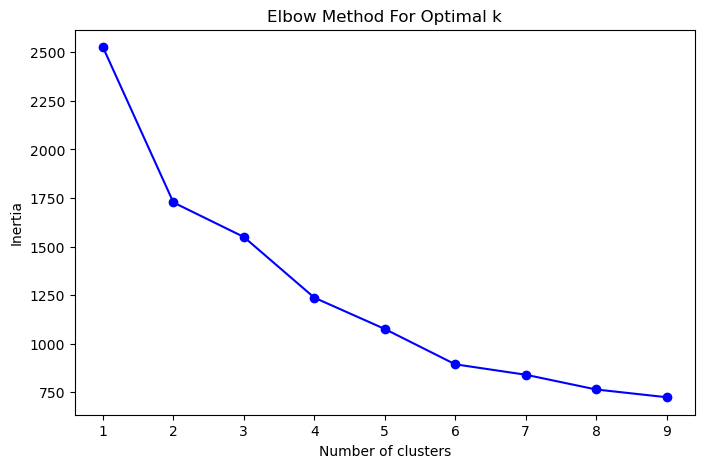

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Your code here:
# Test different cluster numbers
inertia = []
K=range(1,10)

for k in K:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    inertia.append(kmeans.inertia_)

# Visualize the elbow plot
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [13]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

c:\Users\appul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [14]:
clean_customers = df_clean.copy()
clean_customers.rename(columns={"labels": "Labels"}, inplace=True)

Count the values in `labels`.

In [15]:
# Your code here:
pd.Series(labels).value_counts()

1    320
0    101
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
from sklearn.cluster import DBSCAN 

# Your code here


Count the values in `labels_DBSCAN`.

In [17]:
# Your code here
from sklearn.cluster import DBSCAN 

# Your code here
#Initialize and fit DBSCAN
dbscan=DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(customers_scale)
#Extract cluster labels
labels_dbscan = dbscan.labels_
#Add labels to the cleaned dataframe
clean_customers['labels_DBSCAN'] = labels_dbscan


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [29]:
def plot(x,y,hue,title):
    sns.scatterplot(x=x,y=y,hue=hue)
    plt.title(title)
    plt.show

In [32]:
len(df), len(labels), len(labels_dbscan)

(440, 421, 421)

In [30]:
plot(df["Detergents_Paper"],df["Milk"], labels, "KMeans: Detergents_Paper vs. Milk")
plot(df["Detergents_Paper"],df["Milk"], labels_dbscan, "DBSCAN: Detergents_Paper vs. Milk")

ValueError: array length 421 does not match index length 440

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [31]:
# Your code here:
plot(df["Grocery"],df["Fresh"], labels, "KMeans: Grocery vs. Fresh")
plot(df["Grocery"],df["Fresh"], labels_dbscan, "DBSCAN: Grocery vs. Fresh")

ValueError: array length 421 does not match index length 440

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:
plot(df["Frozen"],df["Delicassen"], labels, "KMeans: Detergents_Paper vs. Milk")
plot(df["Frozen"],df["Delicassen"], labels_dbscan, "DBSCAN: Detergents_Paper vs. Milk")

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [34]:
# Your code here:
print("=== K-Means cluster means ===")
display(df.groupby(labels).mean())

print("===DBSCAN cluster means ===")
display(df.groupby(labels_dbscan).mean())

=== K-Means cluster means ===


ValueError: Grouper and axis must be same length

Which algorithm appears to perform better?

**Your observations here**

- K-Means created several well- separated clusters with distinct spending profiles
- DBSCAN classified many points as noise (label=-1) and produced fewer meaningful clusters
- Since the dataset does not naturally form dense, well- separated regions, DBSCAN is not ideal

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 